In [1]:
import csv
import seaborn as sns
import pandas as pd
import matplotlib
from sklearn import preprocessing

matplotlib.rcParams['figure.figsize'] = (20, 10)

# Résolution d'un système

In [12]:
df = pd.read_csv('results/results_single_system.csv')
df

,n_threads,matrix_size,n_steps,time
0,1,128,100,942
1,1,256,100,4225
2,1,512,100,17945
3,1,1024,100,71688
4,1,2048,100,299272
...,...,...,...,...
2295,16,64,500,146724
2296,16,64,1000,12767
2297,16,64,5000,57219
2298,16,64,10000,109769


## Passage à l'échelle fort

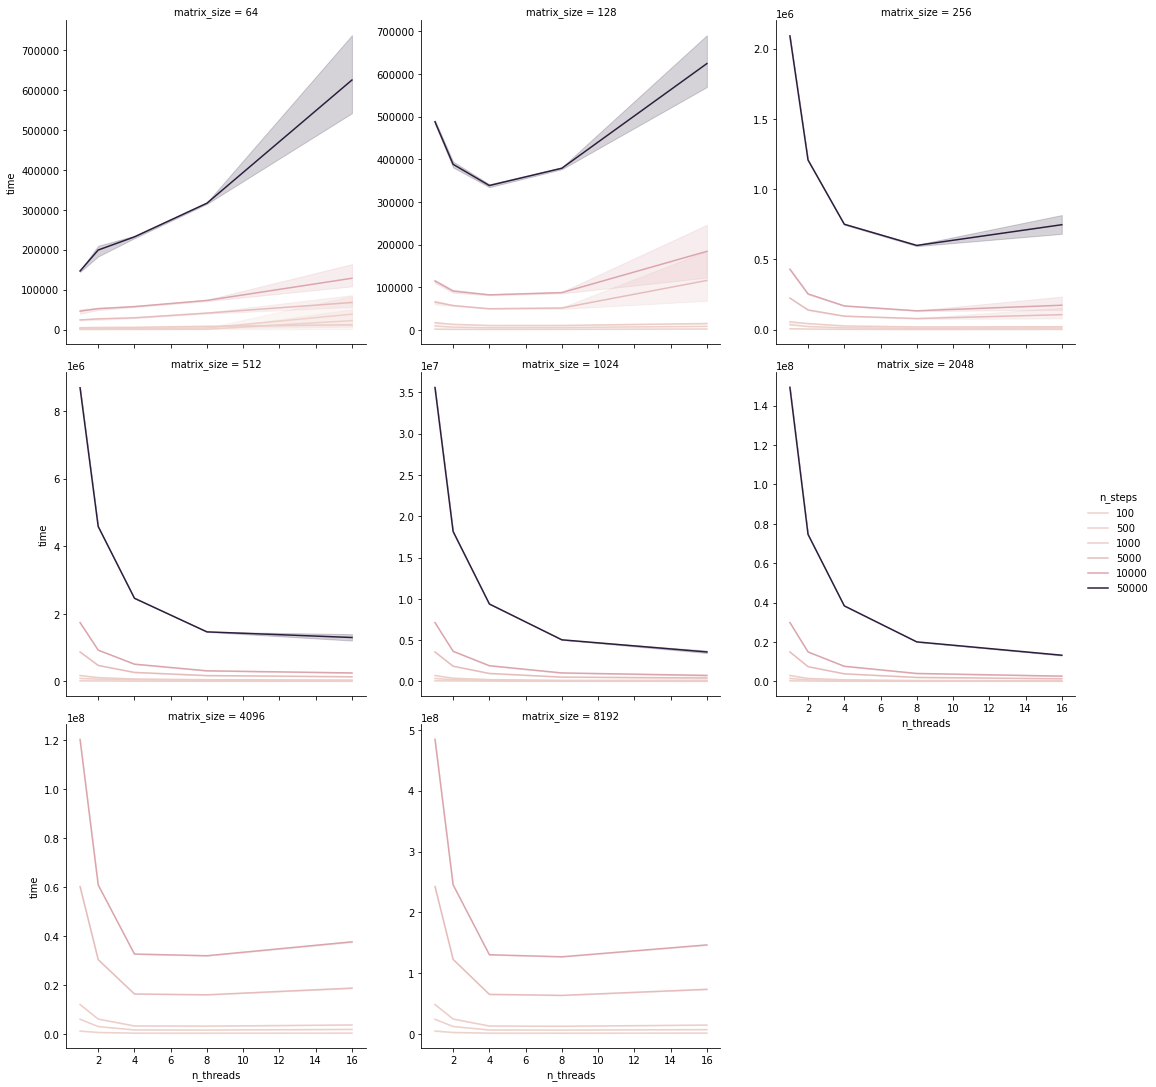

In [3]:
sns.relplot(data=df, x="n_threads", y="time", hue="n_steps", col="matrix_size", col_wrap=3, kind="line", legend="full", facet_kws={'sharey': False})

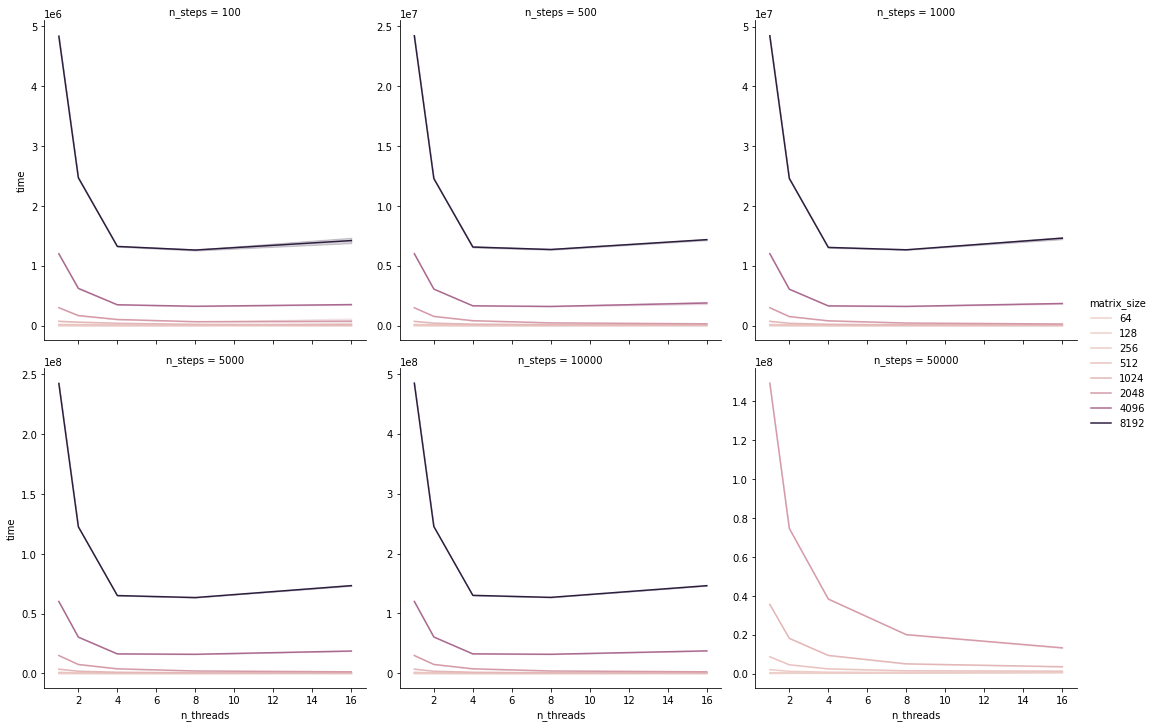

In [4]:
sns.relplot(data=df, x="n_threads", y="time", hue="matrix_size", col="n_steps", col_wrap=3, kind="line", legend="full", facet_kws={'sharey': False})

## Passage à l'échelle faible

In [53]:
n_steps = 10000
x = []
y = []
for i, matrix_size in enumerate(sorted(set(df["matrix_size"]))[3:]):
    n_threads = 2**i
    x.append(n_threads)
    y.append(df[(df["n_steps"] == n_steps) &(df["n_threads"] == n_threads) & (df["matrix_size"] == matrix_size)]["time"].mean())
    
print(x, y)

[1, 2, 4, 8, 16] [1741644.8, 3645372.0, 7677415.0, 31940340.2, 146437911.5]


<AxesSubplot:>

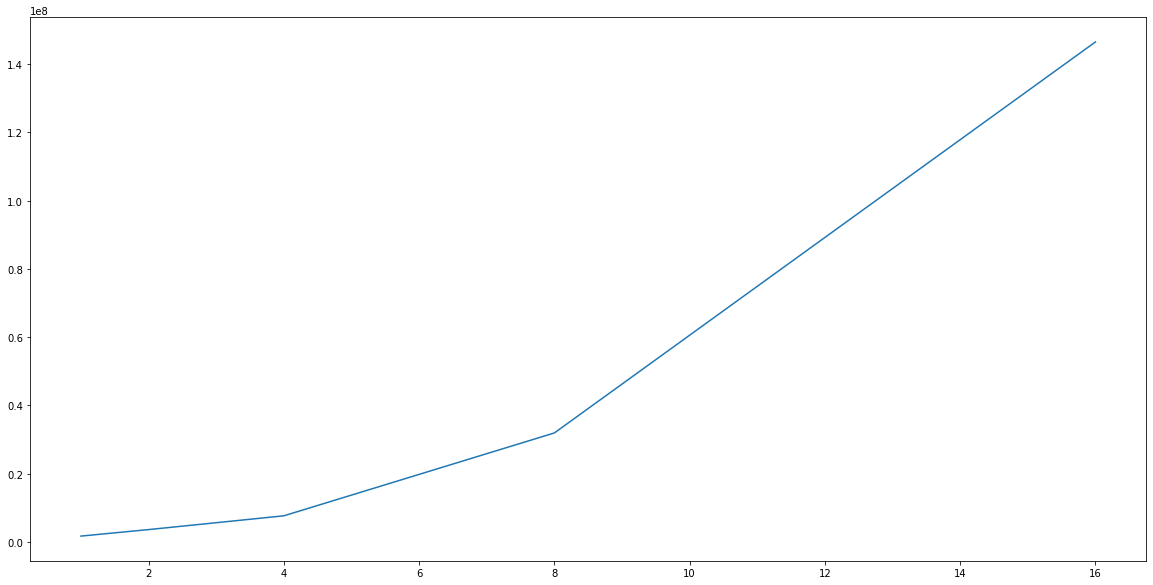

In [55]:
sns.lineplot(x=x, y=y)

# Résolution de plusieurs systèmes

In [11]:
df = pd.read_csv('results/results_multiple_systems.csv')
df

,schedule,n_threads,n_systems,n_steps,time
0,guided-1,1,64,100,1769726
1,guided-1,1,128,100,3074786
2,guided-1,1,256,100,6421516
3,guided-1,1,512,100,11985917
4,guided-1,1,1024,100,24141859
...,...,...,...,...,...
1189,static-0,4,1024,100,6394159
1190,static-0,4,64,500,2683118
1191,static-0,4,128,500,5627163
1192,static-0,4,256,500,9568037


## Using guided scheduling

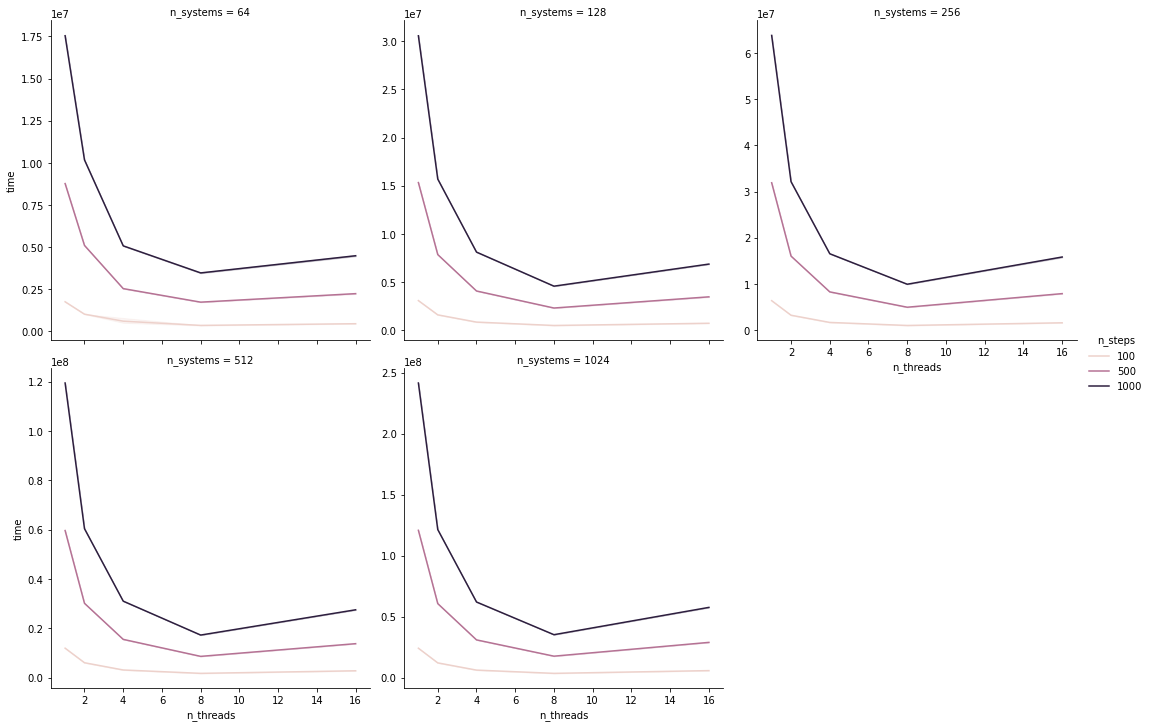

In [6]:
sns.relplot(data=df[df["schedule"] == "guided-1"], x="n_threads", y="time", hue="n_steps", col="n_systems", col_wrap=3, kind="line", legend="full", facet_kws={'sharey': False})

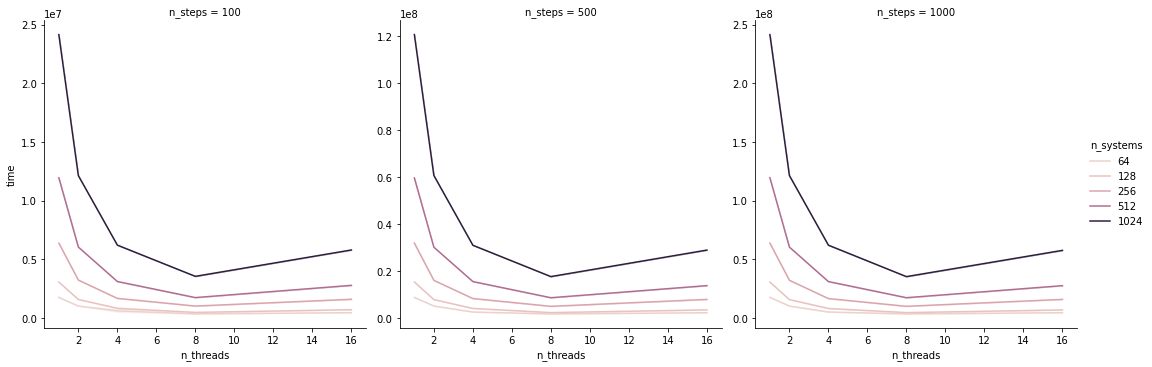

In [7]:
sns.relplot(data=df[df["schedule"] == "guided-1"], x="n_threads", y="time", hue="n_systems", col="n_steps", col_wrap=3, kind="line", legend="full", facet_kws={'sharey': False})

## Using static scheduling

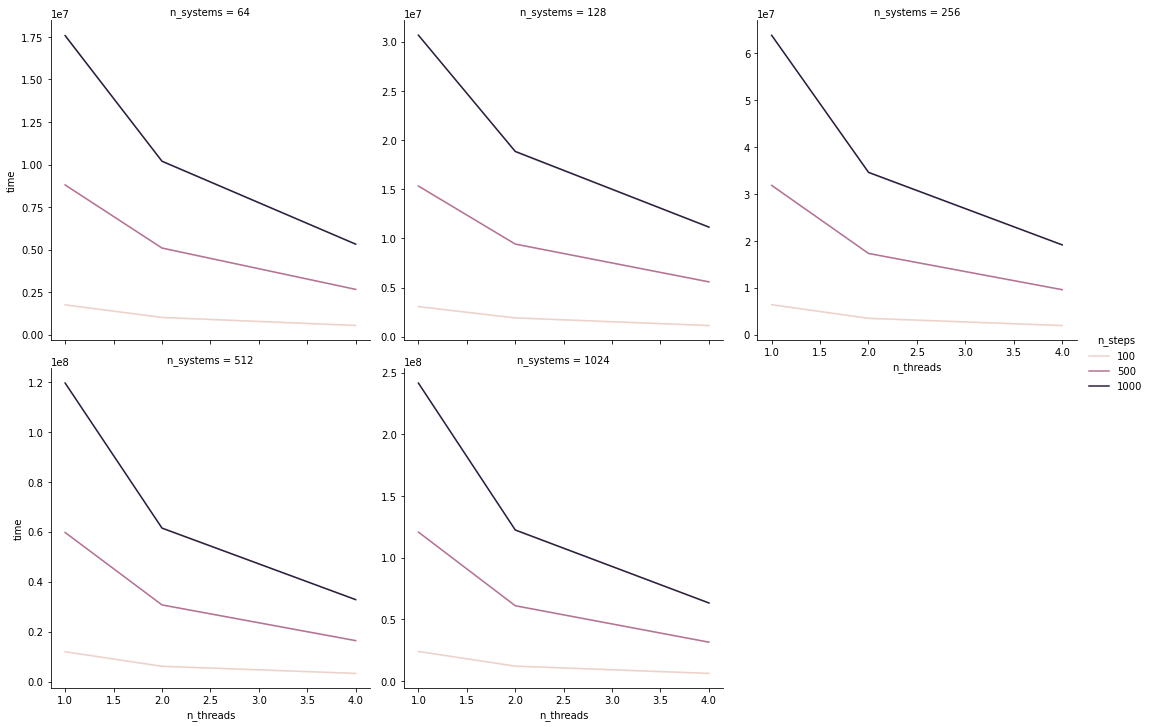

In [8]:
sns.relplot(data=df[df["schedule"] == "static-0"], x="n_threads", y="time", hue="n_steps", col="n_systems", col_wrap=3, kind="line", legend="full", facet_kws={'sharey': False})

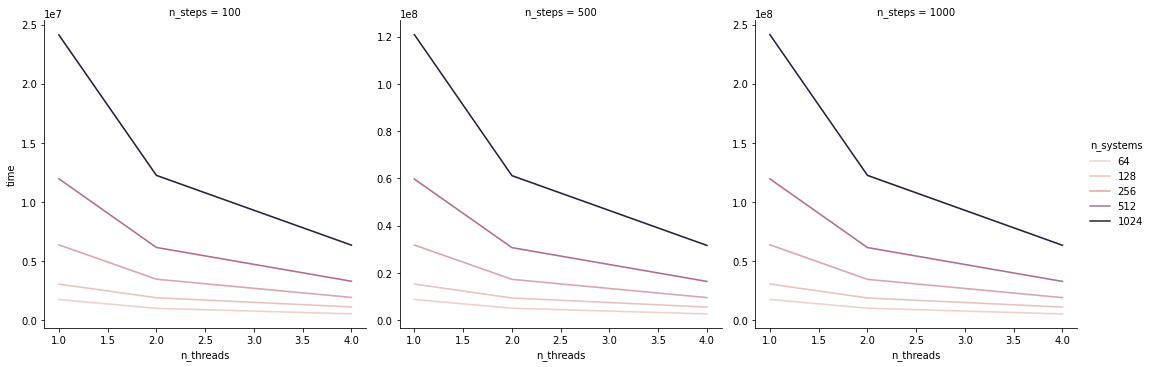

In [9]:
sns.relplot(data=df[df["schedule"] == "static-0"], x="n_threads", y="time", hue="n_systems", col="n_steps", col_wrap=3, kind="line", legend="full", facet_kws={'sharey': False})